In [51]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
import keras.layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [52]:
np.random.seed(0)
train, valid, test = pickle.load(open('dataset.pickle', 'rb'))
train = train.fillna(0)
valid = train.fillna(0)
test = test.fillna(0)

In [53]:
x_train = train[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_train = train.iloc[:,-8:]
x_valid = valid[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_valid = np.asarray(valid.iloc[:,-8:])
x_test = test[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_test = np.asarray(test.iloc[:,-8:])

In [54]:
scaler = MinMaxScaler() #scale features between 0 and 1
x_train = scaler.fit_transform(x_train)
#x_train = np.asarray(x_train).reshape(x_train.shape[0], 1, x_train.shape[1])
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
#x_test = np.asarray(x_test).reshape(x_test.shape[0], 1, x_test.shape[1])

In [55]:
model = Sequential()
#model.add(LSTM(500, input_shape=(x_train.shape[1], x_train.shape[2]), bias_regularizer=L1L2(l1=0.01, l2=0.01)))
#model.add(LSTM(500, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit([x_train], batch_size=200, y=y_train, verbose=1, validation_data=(x_valid, y_valid), 
          shuffle=True, epochs=20)

Train on 298911 samples, validate on 298911 samples
Epoch 1/20
298911/298911 [==============================] - 20s 68us/step - loss: 0.9252 - acc: 0.6778 - val_loss: 0.8786 - val_acc: 0.6915
Epoch 2/20
298911/298911 [==============================] - 19s 63us/step - loss: 0.7741 - acc: 0.7269 - val_loss: 0.7888 - val_acc: 0.7201
Epoch 3/20
298911/298911 [==============================] - 19s 63us/step - loss: 0.7224 - acc: 0.7459 - val_loss: 0.7754 - val_acc: 0.7242
Epoch 4/20
298911/298911 [==============================] - 20s 66us/step - loss: 0.6909 - acc: 0.7571 - val_loss: 0.7118 - val_acc: 0.7469
Epoch 5/20
298911/298911 [==============================] - 19s 63us/step - loss: 0.6661 - acc: 0.7665 - val_loss: 0.6760 - val_acc: 0.7614
Epoch 6/20
298911/298911 [==============================] - 19s 64us/step - loss: 0.6474 - acc: 0.7729 - val_loss: 0.6545 - val_acc: 0.7700
Epoch 7/20
298911/298911 [==============================] - 19s 64us/step - loss: 0.6318 - acc: 0.7779 - val

In [57]:
predicted = model.predict(x_test)
predicted = np.argmax(predicted, axis=1)
y_test_decode = np.argmax(y_test, axis=1)
print(accuracy_score(y_test_decode, predicted))

0.3357433535086451


Train: 0.818, Valid: 0.818, Test: 0.336


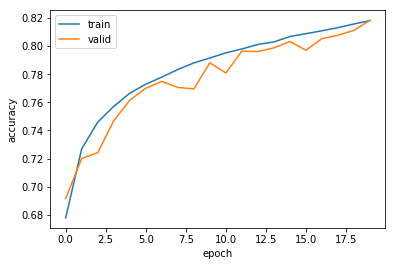

In [58]:
# evaluate the model
_, acc_train = model.evaluate(x_train, y_train, verbose=0)
_, acc_valid = model.evaluate(x_valid, y_valid, verbose=0)
_, acc_test = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f, Test: %.3f' % (acc_train, acc_valid, acc_test))
# learning curves of model accuracy
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [59]:
# save model
import os
dir_name = 'nn'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
filename = dir_name + '/2layers_val_20epoch_3.nn'
model.save(filename)
print('Saved %s' % filename)

Saved nn/2layers_val_20epoch_3.nn
